In [1]:
from tensorflow.keras.models import load_model
models = load_model('CD1.h5')

(654, 1, 2)


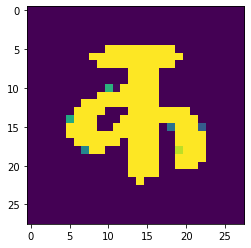

क
(389, 1, 2)


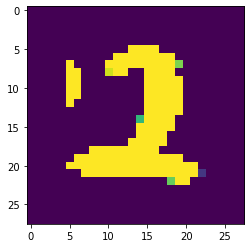

2
(837, 1, 2)


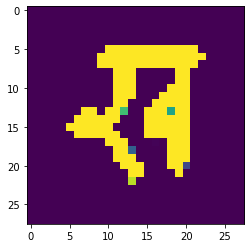

ख
(331, 1, 2)


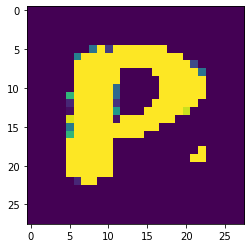

P



----------------Contoured Image--------------------


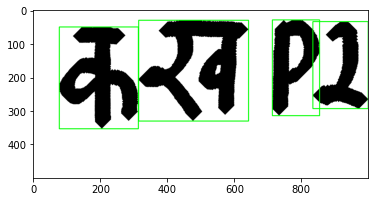

(800, 1, 2)


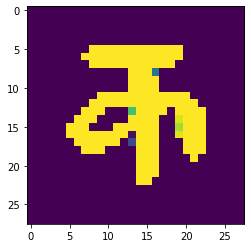

क
(524, 1, 2)


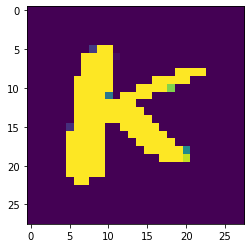

K
(674, 1, 2)


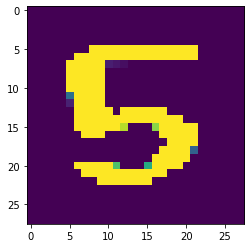

5
(816, 1, 2)


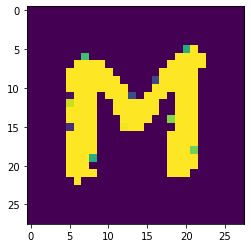

M



----------------Contoured Image--------------------


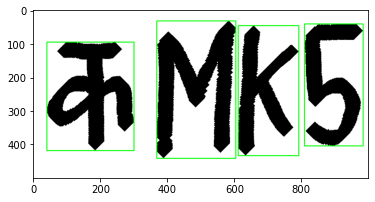

In [ ]:
from keras.models import load_model
from copy import copy
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import ImageTk, Image, ImageDraw
import PIL
import tkinter as tk
from tkinter import *
import collections


width = 1000
height = 500
center = height//2
white = (255, 255, 255)
green = (0,128,0)
words = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X', 'Y','Z','0','1','2',
             '3', '4', '5', '6', '7', '8','9','क','ख']


def testing():
    image = cv2.imread('image.png')
    grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
    contours, bish = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    global preprocessed_digits  # After clearing the interface it should also clear so these should be global variable
    
    preprocessed_digits = {}
        
    
    for c in contours:
        print(c.shape)
        x,y,w,h = cv2.boundingRect(c)
        area = cv2.contourArea(c)
 
        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        if area>1000:
            if (w<115):
                cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
                
                first = [x,w]
                second = [y,h]
    
                # Cropping out the digit from the image corresponding to the current contours in the for loop
                digit = thresh[y:y+h, x:x+w]
                print(digit.shape)
                # Resizing that digit to (4, 20) one looks like one
                resized_digit = cv2.resize(digit, (4,20))
    
                # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
                padded_digit = np.pad(resized_digit, ((4,4),(12,12)), "constant", constant_values=0)
                plt.imshow(padded_digit)
                plt.show()
                i = padded_digit.reshape(1,28,28,1)
                valu = models.predict(i)
                print(words[np.argmax(valu)])
                # Adding the preprocessed digit to the dictionary of preprocessed digits
                preprocessed_digits[x] = padded_digit
                
                
               
            
            
            else: 
                cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
                
                first = [x,w]
                second = [y,h]
    
                # Cropping out the digit from the image corresponding to the current contours in the for loop
                digit = thresh[y:y+h, x:x+w]
                
                # Resizing that digit to (28, 28)
                resized_digit = cv2.resize(digit, (18,18))
    
                # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
                padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
                plt.imshow(padded_digit)
                plt.show()
                im = padded_digit.reshape(1,28,28,1)
                value = models.predict(im)
                print(words[np.argmax(value)])
                # Adding the preprocessed digit to the list of preprocessed digits
                preprocessed_digits[x] = padded_digit
                
               

                
    print("\n\n\n----------------Contoured Image--------------------")
    plt.imshow(image, cmap="gray")
    plt.show()
    
    #inp = np.array(preprocessed_digits)
    
   

   
def predic():
    store = []
   
    preprocessed_digit = collections.OrderedDict(sorted(preprocessed_digits.items()))
    preprocessed_digit = list(preprocessed_digit.values())
    
    inp = np.array(preprocessed_digit)
    for digi in preprocessed_digit:
        im = digi.reshape(1,28,28,1)
        value = models.predict(im)
        store.append(words[np.argmax(value)])
            
    num = "".join(map(str,store))
    return num
                





def paint(event):
    x1, y1 = (event.x - 10), (event.y - 10)
    x2, y2 = (event.x + 10), (event.y + 10)
    cv.create_oval(x1, y1, x2, y2, fill = "black",width = 40)
    draw.line([x1, y1, x2, y2],fill = "black",width = 40)
def model():
    filename = "image.png"
    image1.save(filename)
    testing()
    
    pred = predic()
        #print('argmax',np.argmax(pred[0]),'\n',
        #     pred[0][np.argmax(pred[0])],'\n',classes[np.argmax(pred[0])])
    txt.insert(tk.INSERT,"{}".format(pred))
    
    
def clear():
    cv.delete('all')
    draw.rectangle((0, 0, 1000, 500), fill=(255, 255, 255, 0))
    txt.delete('1.0', END)

root = Tk()
##root.geometry('1000x500') 

root.resizable(0,0)
cv = Canvas(root, width=width, height=height, bg='white')
cv.pack()

# PIL create an empty image and draw object to draw on
# memory only, not visible
image1 = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(image1)

txt=tk.Text(root,bd=3,exportselection=0,bg='WHITE',font='Helvetica',
            padx=10,pady=10,height=5,width=20)

cv.pack(expand=YES, fill=BOTH)
cv.bind("<B1-Motion>", paint)

##button=Button(text="save",command=save)
btnModel=Button(text="Predict",command=model)
btnClear=Button(text="clear",command=clear)
##button.pack()
btnModel.pack()
btnClear.pack()
txt.pack()
root.title('Multi character recognizer')
root.mainloop()









